In [1]:
%cd ~/NetBeansProjects/ExpLosion/
from notebooks.common_imports import *

from gui.user_code import get_demsar_diagram, get_demsar_params
from gui.output_utils import *
%load_ext autoreload

/Volumes/LocalDataHD/m/mm/mmb28/NetBeansProjects/ExpLosion


[268, 269, 270, 271, 272, 273, 274, 275, 276, 277]
Calculating CI for exp 268
Calculating CI for exp 269
Calculating CI for exp 270
Calculating CI for exp 271
Calculating CI for exp 272
Calculating CI for exp 273
Calculating CI for exp 274
Calculating CI for exp 275
Calculating CI for exp 276
Calculating CI for exp 277
Composer has 5000 values
folds has 5000 values
Accuracy has 5000 values
Clusters has 5000 values


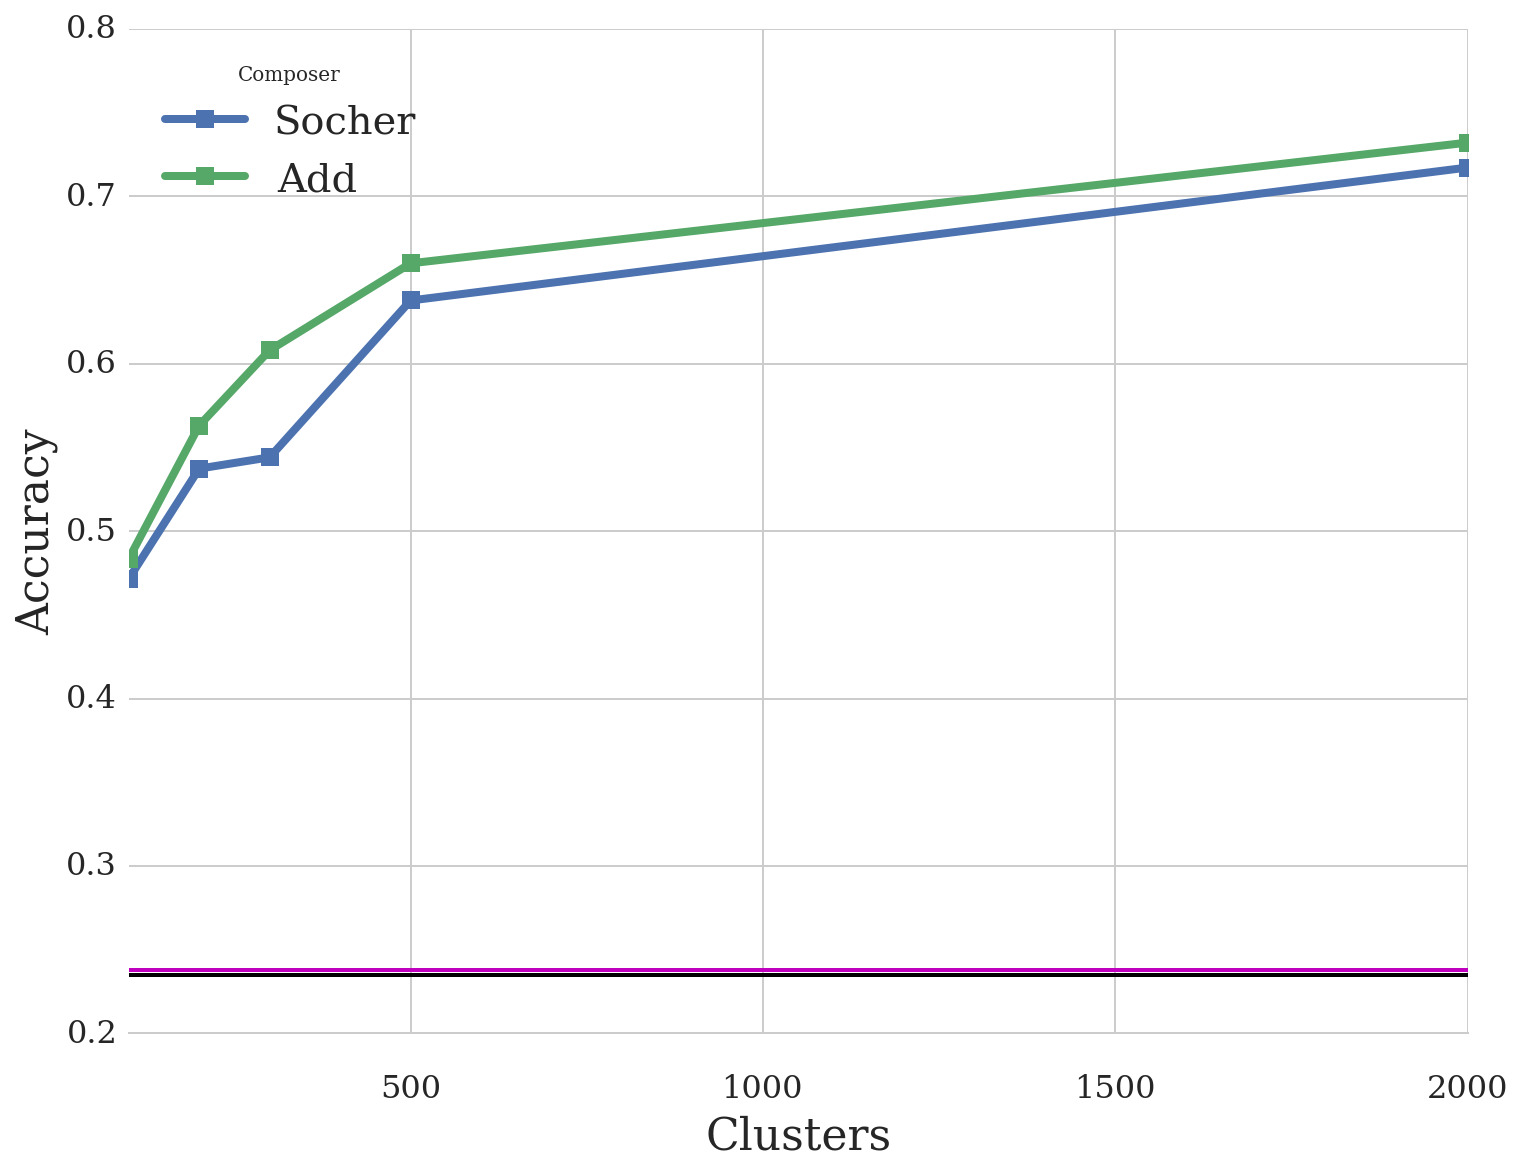

In [2]:
query_dict = {
             'clusters__vectors__algorithm__in': ['turian'],
             'clusters__vectors__composer__in': ['Add', 'Socher'],
             'clusters__vectors__unlabelled__in': ['turian'],
             'clusters__vectors__dimensionality': 100,
             'clusters__vectors__rep': 0,
             'clusters__vectors__unlabelled_percentage': 100,
             'document_features_ev': 'AN+NN',
             'document_features_tr': 'J+N+AN+NN',
             'labelled': 'amazon_grouped-tagged'}
# scores of the same vectors when used to lookup and replace neighbours instead of via clustering
other_dict = {
            'document_features_ev': 'AN+NN',
            'document_features_tr': 'J+N+AN+NN',
            'expansions__decode_handler': 'SignifiedOnlyFeatureHandler',
            'expansions__vectors__algorithm': 'turian',
            'expansions__vectors__composer__in': ['Add', 'Socher'],
            'expansions__vectors__dimensionality': 100,
            'expansions__vectors__rep': 0,
            'expansions__vectors__unlabelled': 'turian',
            'expansions__vectors__unlabelled_percentage': 100,
            'labelled': 'amazon_grouped-tagged'}

ids = Experiment.objects.filter(**query_dict).values_list('id', flat=True)
print(ids)
df = dataframe_from_exp_ids(ids, {'Clusters':'clusters__num_clusters', 
                                  'Composer':'clusters__vectors__composer'})
df = df.convert_objects(convert_numeric=True)
sns.tsplot(data=df, time='Clusters', condition='Composer', 
           value='Accuracy', unit='folds',
           marker='s', linewidth=4)

colors = 'mk'
for i, exp in enumerate(Experiment.objects.filter(**other_dict)):
    plt.axhline(Results.objects.get(id=exp.id, classifier=CLASSIFIER).accuracy_mean,
               label='Neigh: %s'%exp.expansions.vectors.composer, c=colors[i])
sns.despine(left=True)

plt.savefig('plot-clusters1.pdf', format='pdf', dpi=300, bbox_inches='tight', pad_inches=0.1)

[278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297]
Calculating CI for exp 278
Calculating CI for exp 279
Calculating CI for exp 280
Calculating CI for exp 281
Calculating CI for exp 282
Calculating CI for exp 283
Calculating CI for exp 284
Calculating CI for exp 285
Calculating CI for exp 286
Calculating CI for exp 287
Calculating CI for exp 288
Calculating CI for exp 289
Calculating CI for exp 290
Calculating CI for exp 291
Calculating CI for exp 292
Calculating CI for exp 293
Calculating CI for exp 294
Calculating CI for exp 295
Calculating CI for exp 296
Calculating CI for exp 297
Composer has 10000 values
folds has 10000 values
Accuracy has 10000 values
Unlabelled has 10000 values
Clusters has 10000 values


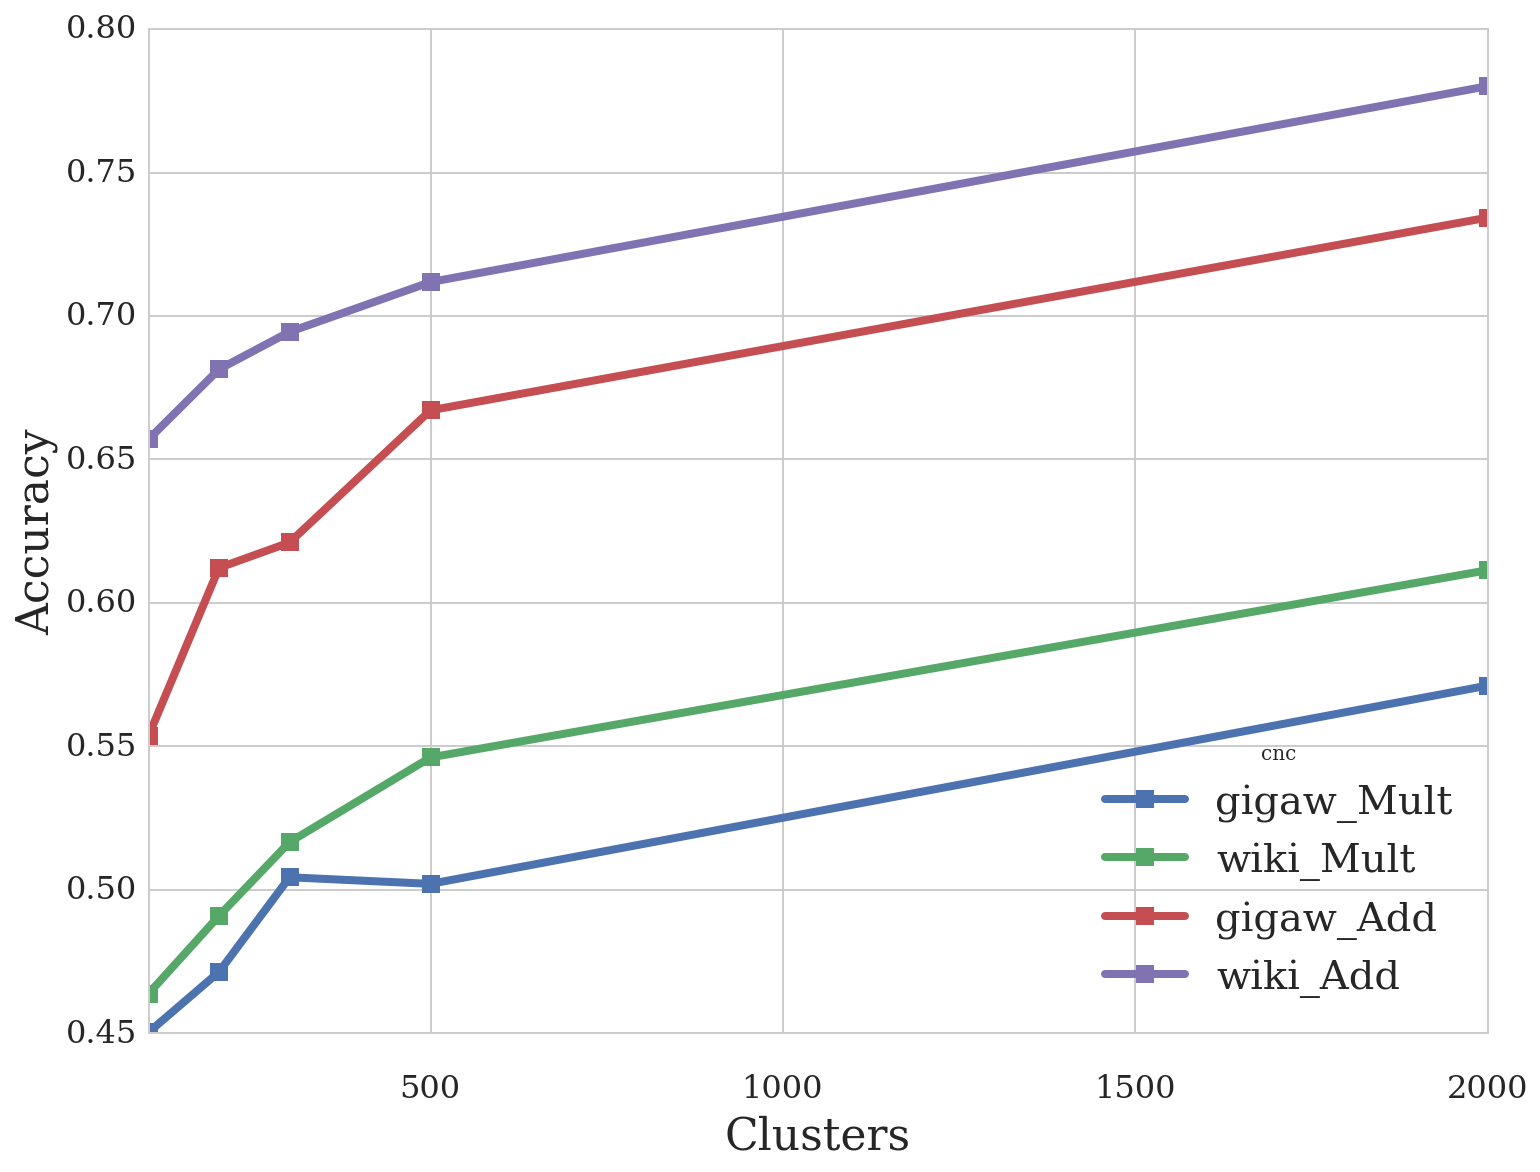

In [3]:
query_dict['clusters__vectors__algorithm__in'] = ['word2vec']
query_dict['clusters__vectors__composer__in'] = ['Add', 'Mult']
query_dict['clusters__vectors__unlabelled__in'] = ['gigaw', 'wiki']

other_dict['expansions__vectors__algorithm'] = 'word2vec'
other_dict['expansions__vectors__composer__in'] = ['Add', 'Mult']
other_dict['expansions__vectors__unlabelled__in'] = ['gigaw', 'wiki']

ids = Experiment.objects.filter(**query_dict).values_list('id', flat=True)
print(ids)
df = dataframe_from_exp_ids(ids, {'Clusters':'clusters__num_clusters', 
                                  'Composer':'clusters__vectors__composer',
                                  'Unlabelled':'clusters__vectors__unlabelled'
                                 })
df = df.convert_objects(convert_numeric=True)
df['cnc'] = df.Unlabelled + '_' + df.Composer
sns.tsplot(data=df, time='Clusters', condition='cnc', 
           value='Accuracy', unit='folds',
           marker='s', linewidth=4)

# colors = 'mkcy'
# for i, exp in enumerate(Experiment.objects.filter(**other_dict)):
#     plt.axhline(Results.objects.get(id=exp.id, classifier=CLASSIFIER).accuracy_mean,
#                label='Neigh: %s'%exp.expansions.vectors.composer, c=colors[i])
# sns.despine(left=True)
    
plt.savefig('plot-clusters2.pdf', format='pdf', dpi=300, bbox_inches='tight', pad_inches=0.1)